In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Tanya\Downloads\2023 QS World University Rankings.csv')      #importing csv file
df

,Rank,institution,location code,location,Academic reputation score,Employer reputation score,Faculty student score,Citations per faculty score,International Faculty score,International Students score,International Research Network score,Employment Outcome score
0,1,MIT,US,United States,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0
1,2,University of Cambridge,UK,United Kingdom,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0
2,3,Stanford University,US,United States,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0
3,4,University of Oxford,UK,United Kingdom,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0
4,5,Harvard University,US,United States,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,5.8,3.6,1.0,1.7,NaN,8.1,NaN
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,5.8,2.4,2.2,9.3,1.3,8.8,30.9
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,2.6,3.2,3.6,5.2,2.8,51.1,NaN
1420,1421,University of Craiova,RO,Romania,3.3,1.8,2.7,2.0,NaN,NaN,7.5,8.7


In [3]:
df.info()     #fenching datatype of entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rank                                  1422 non-null   int64  
 1   institution                           1422 non-null   object 
 2   location code                         1422 non-null   object 
 3   location                              1422 non-null   object 
 4   Academic reputation score             1422 non-null   float64
 5   Employer reputation score             1421 non-null   float64
 6   Faculty student score                 1420 non-null   float64
 7   Citations per faculty score           1417 non-null   float64
 8   International Faculty score           1324 non-null   float64
 9   International Students score          1365 non-null   float64
 10  International Research Network score  1409 non-null   float64
 11  Employment Outcom

In [4]:
# fentching how many institutions are there in each country

count_df = pd.DataFrame()                   #creating a new dataframe 
count_df['Count'] = df.groupby('location')['location'].count().sort_values(ascending=False)  
#df.groupby function is used here to group similar category data and count function is used to count the number of similar category data
#sort function is used here to arrange the values in descending order.
count_df = count_df.reset_index()    # reset.index() is used to reset the index for the new data frame
count_df['location code'] = df['location code']
count_df

,location,Count,location code
0,United States,201,US
1,United Kingdom,90,UK
2,China (Mainland),71,US
3,Japan,50,UK
4,Russia,48,US
...,...,...,...
95,Puerto Rico,1,UK
96,Qatar,1,UK
97,Ghana,1,IE
98,Georgia,1,KR


In [5]:
#filtering the data of count column to see mony many countries are having more than 50 institutions 
count_df = count_df.loc[count_df['Count']>50].copy()        # .loc is used to access specific location in the csv file
#.copy() is used to copy the data from the parent dataframe
count_df

,location,Count,location code
0,United States,201,US
1,United Kingdom,90,UK
2,China (Mainland),71,US


<function matplotlib.pyplot.show(close=None, block=None)>

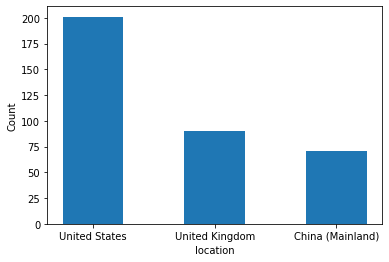

In [6]:
# plotting bar graph for the no. of institutions in top countries
x = count_df['location']
y = count_df['Count']
plt.xlabel('location')   #providing the label for x axis
plt.ylabel('Count')      #providing label for y axis
plt.bar(x,y,width=0.5)   #plotting of graph having width 0.5
plt.show


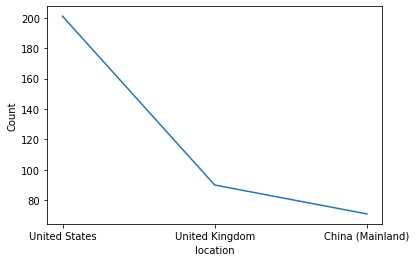

In [7]:
#plotting line graph for the no. of institutions in top countries
plt.xlabel('location')
plt.ylabel('Count')
plt.plot(count_df['location'],count_df['Count'])

([<matplotlib.patches.Wedge at 0x1951c75c430>,
 [Text(-0.236596909617314, 1.3494153928125827, 'United States'),
  Text(-0.5867579198651036, -1.237988345452241, 'United Kingdom'),
  Text(1.1180550503228233, -0.7917404274430033, 'China (Mainland)')],
 [Text(-0.13297782511338085, 0.7584305492450281, '55.52%'),
  Text(-0.32978364839133567, -0.6958036686118433, '24.86%'),
  Text(0.6283959041960392, -0.4449927949862135, '19.61%')])

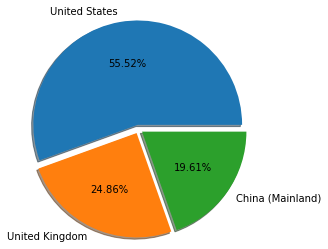

In [8]:
#pie chart for the no. of institutions in top countries
x = count_df['location']
y = count_df['Count']
plt.pie(y,labels=x,radius=1.2,autopct='%0.2f%%',shadow = True,explode = [0.05,0.05,0.05]) 

In [9]:
# Now we going to find what mean score each institution is having
df['Total score'] = df.iloc[:,4:12].sum(axis=1)    # df.iloc is used to locate a specific location in the csv file . 
                                                   # The first parameter is the range of rows and second parameter represents the column range
                                                   # axis = 1 means it will compute in horizontal axis
df['Mean score'] = df['Total score']/8
df

,Rank,institution,location code,location,Academic reputation score,Employer reputation score,Faculty student score,Citations per faculty score,International Faculty score,International Students score,International Research Network score,Employment Outcome score,Total score,Mean score
0,1,MIT,US,United States,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0,786.1,98.2625
1,2,University of Cambridge,UK,United Kingdom,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0,788.1,98.5125
2,3,Stanford University,US,United States,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0,756.3,94.5375
3,4,University of Oxford,UK,United Kingdom,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0,787.1,98.3875
4,5,Harvard University,US,United States,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0,743.2,92.9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,5.8,3.6,1.0,1.7,NaN,8.1,NaN,24.8,3.1000
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,5.8,2.4,2.2,9.3,1.3,8.8,30.9,63.7,7.9625
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,2.6,3.2,3.6,5.2,2.8,51.1,NaN,71.3,8.9125
1420,1421,University of Craiova,RO,Romania,3.3,1.8,2.7,2.0,NaN,NaN,7.5,8.7,26.0,3.2500


In [10]:
#filtering the institutions having mean score greater than 95 to find out the best out 1422 institutions
df = df.loc[df['Mean score']>95].copy()
df

,Rank,institution,location code,location,Academic reputation score,Employer reputation score,Faculty student score,Citations per faculty score,International Faculty score,International Students score,International Research Network score,Employment Outcome score,Total score,Mean score
0,1,MIT,US,United States,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0,786.1,98.2625
1,2,University of Cambridge,UK,United Kingdom,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0,788.1,98.5125
3,4,University of Oxford,UK,United Kingdom,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0,787.1,98.3875
6,7,Imperial College London,UK,United Kingdom,98.3,99.7,99.5,86.5,100.0,100.0,98.1,88.8,770.9,96.3625
7,8,UCL,UK,United Kingdom,99.4,98.6,97.6,77.0,99.2,100.0,100.0,90.3,762.1,95.2625


In [11]:
# condition for giving grade to the top 5 institutions filtered
def grade(mean_score):          #creating the function for calculating grade
    if mean_score>98:
        return 'A+'
    else:
        return 'A'

#creating a new column named grade
df['Grade'] = df['Mean score'].apply(grade) # .apply() is used here to apply the grade function to the Mean score column
df

,Rank,institution,location code,location,Academic reputation score,Employer reputation score,Faculty student score,Citations per faculty score,International Faculty score,International Students score,International Research Network score,Employment Outcome score,Total score,Mean score,Grade
0,1,MIT,US,United States,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0,786.1,98.2625,A+
1,2,University of Cambridge,UK,United Kingdom,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0,788.1,98.5125,A+
3,4,University of Oxford,UK,United Kingdom,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0,787.1,98.3875,A+
6,7,Imperial College London,UK,United Kingdom,98.3,99.7,99.5,86.5,100.0,100.0,98.1,88.8,770.9,96.3625,A
7,8,UCL,UK,United Kingdom,99.4,98.6,97.6,77.0,99.2,100.0,100.0,90.3,762.1,95.2625,A


In [12]:
# replcing the institution names by their Abbreviations 
df['institution'].replace({"University of Cambridge":"UC"},inplace=True)
df['institution'].replace({"University of Oxford":"UO"},inplace=True)
df['institution'].replace({"Imperial College London":"ICL"},inplace=True)
df

,Rank,institution,location code,location,Academic reputation score,Employer reputation score,Faculty student score,Citations per faculty score,International Faculty score,International Students score,International Research Network score,Employment Outcome score,Total score,Mean score,Grade
0,1,MIT,US,United States,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0,786.1,98.2625,A+
1,2,UC,UK,United Kingdom,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0,788.1,98.5125,A+
3,4,UO,UK,United Kingdom,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0,787.1,98.3875,A+
6,7,ICL,UK,United Kingdom,98.3,99.7,99.5,86.5,100.0,100.0,98.1,88.8,770.9,96.3625,A
7,8,UCL,UK,United Kingdom,99.4,98.6,97.6,77.0,99.2,100.0,100.0,90.3,762.1,95.2625,A


<function matplotlib.pyplot.show(close=None, block=None)>

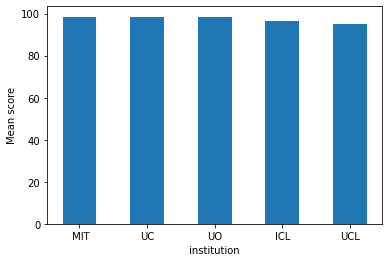

In [13]:
#plotting bar graph to show mean score of top five institutes
x = df['institution']
y = df['Mean score']
plt.xlabel('institution')
plt.ylabel('Mean score')
plt.bar(x,y,width=0.5) 
plt.show


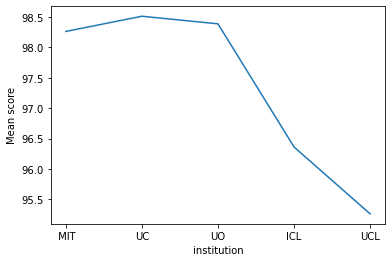

In [14]:
#plotting line graph to show mean score of top five institutes
plt.xlabel('institution')
plt.ylabel('Mean score')
plt.plot(df['institution'],df['Mean score'])

([<matplotlib.patches.Wedge at 0x1951d85e190>,
 [Text(1.10363114189723, 0.8117255094147384, ' MIT'),
  Text(-0.4972802898188815, 1.4363538259626873, 'UC'),
  Text(-1.3692433628068317, -0.04552596412421103, 'UO'),
  Text(-0.42107804431897233, -1.4605113079303802, 'ICL'),
  Text(1.11913941985783, -0.7902069089297306, 'UCL')],
 [Text(0.6202890359568372, 0.4562252863133931, '20.19%'),
  Text(-0.30098543857458615, 0.8693720525563633, '20.24%'),
  Text(-0.7695747367600441, -0.025587585675651454, '20.21%'),
  Text(-0.2548630268246411, -0.8839936863789143, '19.80%'),
  Text(0.6290053673653497, -0.4441308904203595, '19.57%')])

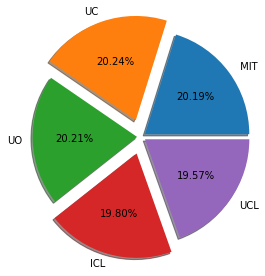

In [15]:
#pie chart showing mean score of top five institutes
x = df['institution']
y = df['Mean score']
plt.pie(y,labels=x,radius=1.2,autopct='%0.2f%%',shadow = True,explode = [0.05,0.2,0.05,0.2,0.05])

In [16]:
#creating new dataframe which shows how many top institution are there in which country to give us a clear cut view that 
#where we should go
new_df = pd.DataFrame()
new_df['Count'] = df.groupby('location')['location'].count().sort_values(ascending=False)
new_df = new_df.reset_index()
new_df['location code'] = df['location code']
new_df


,location,Count,location code
0,United Kingdom,4,US
1,United States,1,UK


<function matplotlib.pyplot.show(close=None, block=None)>

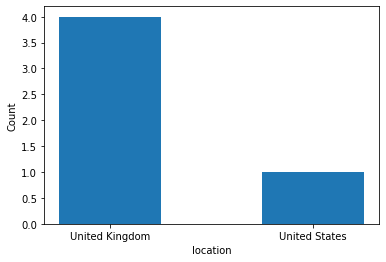

In [17]:
x = new_df['location']
y = new_df['Count']
plt.xlabel('location')
plt.ylabel('Count')
plt.bar(x,y,width=0.5) 
plt.show
